In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### List columns names based on the description

In [3]:
col_names = ['class', 'lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s', 'by pass', 
 'extravasates', 'regeneration of', 'early uptake in', 'lym.nodes dimin', 'lym.nodes enlar', 
'changes in lym.', 'defect in node', 'changes in node', 'changes in stru', 'special forms', 
'dislocation of', 'exclusion of no', 'no. of nodes in']

In [4]:
df = pd.read_csv("lymphography.csv", names=col_names)

In [5]:
print("Size of dataset:", df.shape)

Size of dataset: (148, 19)


In [6]:
df.head()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [7]:
df.describe()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


In [8]:
df["class"].value_counts()

2    81
3    61
4     4
1     2
Name: class, dtype: int64

In [9]:
# Data Modeling

In [10]:
### Split the features and the target column.
x = df.drop('class', axis=1)
y = df['class']

In [11]:
x.shape, y.shape

((148, 18), (148,))

In [12]:
## Classification Algorithms ##
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## For building models ##
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

## For measuring performance ##
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
## To visualize decision tree ##
from IPython.display import Image
from sklearn.tree import export_graphviz

## Ignore warnings ##
import warnings
warnings.filterwarnings('ignore')

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)

In [14]:
### Check shape to make sure it is all in order
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((77, 18), (45, 18), (77,), (45,))

In [15]:
from tensorflow.keras.layers import Dense 

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [17]:
y = df['class']

In [18]:
y

0      3
1      2
2      3
3      3
4      2
      ..
143    3
144    2
145    3
146    2
147    2
Name: class, Length: 148, dtype: int64

In [19]:
y_ = to_categorical(y, num_classes=0)

In [20]:
y_

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0.

In [21]:
x.shape[1]

18

In [22]:
model = Sequential()

model.add(Dense(100, input_shape=(x.shape[1],)))
model.add(Dense(30, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1900      
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 3)                 93        
                                                                 
Total params: 5,023
Trainable params: 5,023
Non-trainable params: 0
_________________________________________________________________


In [24]:
import tensorflow
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [25]:
# We've seen above that the dataset is imbalanced.
# As a workaround, we will upsample/oversample minority classes so that its count is same as the major classes

In [26]:
df_train = pd.concat([x_train, y_train], axis=1)

In [27]:
df_train['class'].value_counts()

2    38
3    36
4     2
1     1
Name: class, dtype: int64

In [28]:
df_train.head()

,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in,class
147,2,2,2,1,2,2,1,2,1,3,3,4,3,4,3,2,2,6,2
124,4,2,1,1,1,2,1,1,1,2,2,3,3,5,2,1,2,1,2
129,3,2,1,1,1,2,1,2,1,3,2,4,3,4,2,2,2,2,2
65,4,1,1,1,2,1,2,2,1,3,2,3,4,5,3,2,2,7,3
61,3,2,2,1,2,2,1,2,1,3,2,2,3,4,1,2,2,1,2


In [29]:
# After merging the x_train and y_train, let's create a dataframe for the upsampled data and 
# initialize it with the dominating class.

In [30]:
df_train_up = df_train[df_train["class"]==2]
### Upsample minority classes
for n in [1, 3, 4]:
    upsampled = resample(df_train[df_train["class"]==n],
                        replace=True, # sample with replacement
                        n_samples=53, # match number in majority class
                        random_state=1) # reproducible results
    df_train_up = pd.concat([df_train_up, upsampled]) 
    print("Size of df_train_up:", df_train_up.shape, "\nValue counts for class:\n", df_train_up["class"].value_counts())
df_train_up.head()

Size of df_train_up: (91, 19) 
Value counts for class:
 1    53
2    38
Name: class, dtype: int64
Size of df_train_up: (144, 19) 
Value counts for class:
 1    53
3    53
2    38
Name: class, dtype: int64
Size of df_train_up: (197, 19) 
Value counts for class:
 1    53
3    53
4    53
2    38
Name: class, dtype: int64


,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in,class
147,2,2,2,1,2,2,1,2,1,3,3,4,3,4,3,2,2,6,2
124,4,2,1,1,1,2,1,1,1,2,2,3,3,5,2,1,2,1,2
129,3,2,1,1,1,2,1,2,1,3,2,4,3,4,2,2,2,2,2
61,3,2,2,1,2,2,1,2,1,3,2,2,3,4,1,2,2,1,2
103,3,2,1,1,2,2,1,1,1,2,2,4,3,2,1,2,2,3,2


In [33]:
x_train_up = df_train_up.drop(["class"], axis=1)
y_train_up = df_train_up["class"]

In [34]:
# Build the Models

In [35]:
def confmatrix(y_pred, title):
    cm = metrics.confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    plt.figure(figsize = (10,7))
    plt.title(title)
    
    sns.set(font_scale=1.4) # For label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}) # Font size
    plt.show()

In [36]:
# K-Nearest Neighbors

In [37]:
### Finding the best k

best_k = {"Regular":0, "Upsampled":0}
best_score = {"Regular":0, "Upsampled":0}

for k in range(3, 50, 2):
    
    ## Using Not upsampled training set
    knn_temp = KNeighborsClassifier(n_neighbors=k)              # Instantiate the model
    knn_temp.fit(x_train, y_train)                              # Fit the model to the training set
    knn_temp_pred = knn_temp.predict(x_test)                    # Predict on the test set
    score = metrics.accuracy_score(y_test, knn_temp_pred) * 100 # Get accuracy
    if score >= best_score["Regular"] and score < 100:          # Store best params
        best_score["Regular"] = score
        best_k["Regular"] = k
        
    ## Using Upsampled training set
    knn_temp = KNeighborsClassifier(n_neighbors=k)              # Instantiate the model
    knn_temp.fit(x_train_up, y_train_up)                        # Fit the model to the training set
    knn_temp_pred = knn_temp.predict(x_test)                    # Predict on the test set
    score = metrics.accuracy_score(y_test, knn_temp_pred) * 100 # Get accuracy
    if score >= best_score["Upsampled"] and score < 100:        # Store best params
        best_score["Upsampled"] = score
        best_k["Upsampled"] = k
        
### Print the best score and best k
print("---Best results---\nK: {}\nScore: {}".format(best_k, best_score))

---Best results---
K: {'Regular': 39, 'Upsampled': 11}
Score: {'Regular': 75.55555555555556, 'Upsampled': 71.11111111111111}


In [38]:
## Instantiate the models
knn = KNeighborsClassifier(n_neighbors=best_k["Regular"])
knn_up = KNeighborsClassifier(n_neighbors=best_k["Upsampled"])

## Fit the model to the training set
knn.fit(x_train, y_train)
knn_up.fit(x_train_up, y_train_up)

KNeighborsClassifier(n_neighbors=11)

In [39]:
# Validate the KNN model

In [40]:
### Predict on the test set
knn_pred = knn.predict(x_test)
knn_pred_up = knn_up.predict(x_test)

In [41]:
# Classification Report

In [42]:
### Get performance metrics
knn_score = metrics.accuracy_score(y_test, knn_pred) * 100
knn_score_up = metrics.accuracy_score(y_test, knn_pred_up) * 100

### Print classification report for regular
print("----- Regular Training Set Used -----")
print("Classification report for {}:\n{}".format(knn, metrics.classification_report(y_test, knn_pred)))
print("Accuracy score:", knn_score)

### Print classification report for upsampled
print("\n----- Upsampled Training Set Used -----")
print("Classification report for {}:\n{}".format(knn_up, metrics.classification_report(y_test, knn_pred_up)))
print("Accuracy score:", knn_score_up)

----- Regular Training Set Used -----
Classification report for KNeighborsClassifier(n_neighbors=39):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.81      0.89      0.85        28
           3       0.64      0.64      0.64        14
           4       0.00      0.00      0.00         2

    accuracy                           0.76        45
   macro avg       0.36      0.38      0.37        45
weighted avg       0.70      0.76      0.73        45

Accuracy score: 75.55555555555556

----- Upsampled Training Set Used -----
Classification report for KNeighborsClassifier(n_neighbors=11):
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.87      0.71      0.78        28
           3       0.53      0.71      0.61        14
           4       1.00      0.50      0.67         2

    accuracy                           0.71        4

In [43]:
# Cross-Validation of the KNN model

In [44]:
knn_cv = np.mean(cross_val_score(knn, x, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", knn_cv)

10-Fold Cross-Validation score for KNN fit in Regular Training Set: 72.23809523809524


In [45]:
cv_method = StratifiedKFold(n_splits=3, 
                            random_state=42, shuffle=True
                            )

scores_knn = cross_val_score(knn, x_train, y_train, cv = 10, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for K-Nearest Neighbors model:\n{scores_knn}")
print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")

Scores(Cross validate) for K-Nearest Neighbors model:
[0.75       0.875      0.625      0.5        0.5        0.75
 0.75       0.57142857 0.57142857 0.57142857]
CrossValMeans: 0.646
CrossValStandard Deviation: 0.12


In [46]:
params_knn = {"leaf_size": list(range(1,30)),
              "n_neighbors": list(range(1,21)),
              "p": [1,2]}

In [47]:
GridSearchCV_knn = GridSearchCV(estimator=KNeighborsClassifier(), 
                                param_grid=params_knn, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=-1,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [48]:
GridSearchCV_knn.fit(x_train, y_train)

Fitting 3 folds for each of 1160 candidates, totalling 3480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [49]:
best_score_knn = GridSearchCV_knn.best_score_
print(f"Best score for GNB model: {round(best_score_knn, 3)}")

Best score for GNB model: 0.804


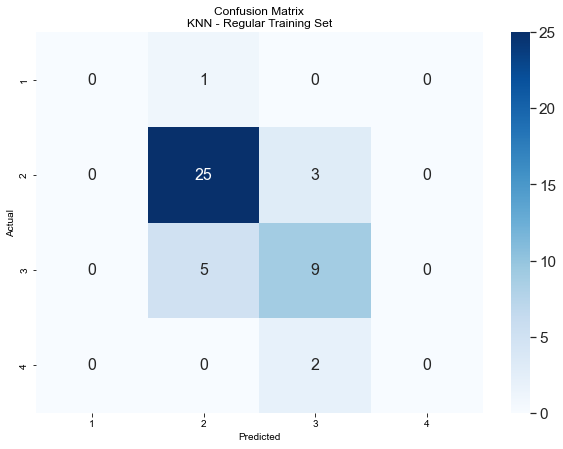

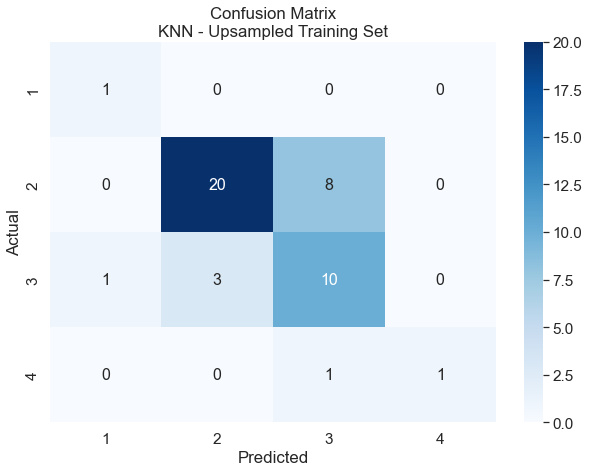

In [50]:
### Plot confusion matrix
confmatrix(knn_pred, "Confusion Matrix\nKNN - Regular Training Set")
confmatrix(knn_pred_up, "Confusion Matrix\nKNN - Upsampled Training Set")